In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
vehicles_df = pd.read_csv('UsedVehiclesWithNoDuplicatevin.csv')

C:\Users\KEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [120]:
vehicles_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,lat,long,State
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,46.8433,-92.2550,Minnesota
1,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,45.6836,-92.9648,Minnesota
2,7184711787,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,13995,2012.0,ford,f-150,good,6 cylinders,...,4wd,full-size,truck,grey,https://images.craigslist.org/00W0W_io2cwEVtyh...,"**Bad Credit, No Credit... No Problem!**2012 F...",NaN,45.6836,-92.9648,Minnesota
3,7184710887,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,7995,2010.0,chevrolet,equinox,good,4 cylinders,...,4wd,full-size,SUV,grey,https://images.craigslist.org/00404_j5GItixnjX...,"**Bad Credit, No Credit... No Problem!**2010 C...",NaN,45.6836,-92.9648,Minnesota
4,7184710023,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,8995,2011.0,chevrolet,traverse,good,6 cylinders,...,4wd,full-size,SUV,white,https://images.craigslist.org/00T0T_bwYCuKicjX...,"**Bad Credit, No Credit... No Problem!**2011 C...",NaN,45.6836,-92.9648,Minnesota


In [121]:
#Add new column - car_age
import datetime
current_time = datetime.datetime.now()
#current_time.year

vehicles_df['car_age'] = current_time.year - vehicles_df['year']

In [122]:
#Drop irrelevant columns
irrelevant = ['id', 'url', 'region_url', 'vin', 'image_url', 'description', 'county', 'size', 'year', 'lat', 'long', 'State', 'region']
df = vehicles_df.drop(columns=irrelevant, axis = 1)
df.head(2)

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,car_age
0,6995,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,red,20.0
1,16995,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,truck,white,13.0


In [123]:
df.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

In [124]:
df.shape

(343025, 13)

In [125]:
df.dtypes

price             int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
car_age         float64
dtype: object

In [126]:
#We now have 17 columns, 12 of them are categorical

<AxesSubplot:>

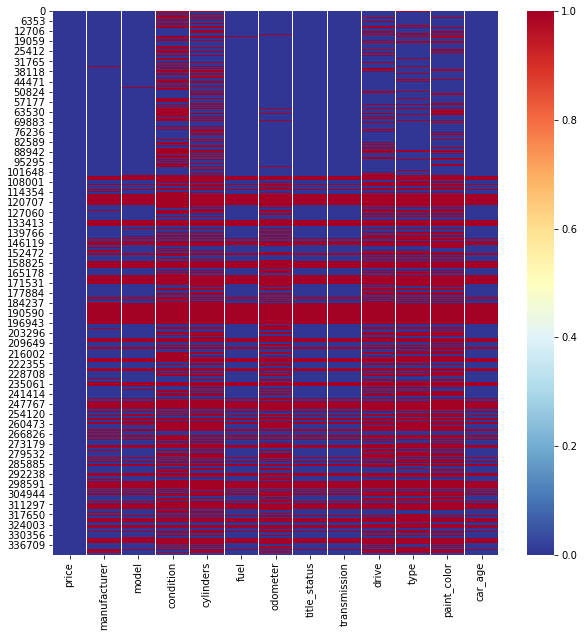

In [127]:
#visualize missing values
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.isnull(), cmap = 'RdYlBu_r', ax=ax)

In [128]:
#check missing values
missing_values = df.isnull().sum()
#check percentages of missing data in each column
missing_percentage = round((df.isnull().sum()/df.shape[0] *100),2)
#Put the in a dataframe
missing_df = pd.DataFrame(missing_values, columns = ['missing_values'])
missing_p = pd.DataFrame(missing_percentage, columns = ['missing_percentages'])
missing_df['missing_percentages'] = missing_p
missing_df.sort_values(by = 'missing_percentages', ascending=False)

,missing_values,missing_percentages
condition,198703,57.93
cylinders,190258,55.46
paint_color,176436,51.44
drive,173016,50.44
type,169677,49.46
odometer,150953,44.01
manufacturer,107156,31.24
model,98115,28.60
fuel,95763,27.92
title_status,95420,27.82


### Exploring Numerical Features

In [129]:
df.corr()

,price,odometer,car_age
price,1.000000,-0.000709,0.005773
odometer,-0.000709,1.000000,0.190517
car_age,0.005773,0.190517,1.000000


In [130]:
df.corrwith(df['price'])

price       1.000000
odometer   -0.000709
car_age     0.005773
dtype: float64

There's very low correlation between price and car_age, and between price and odometer

In [131]:
df.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,price,odometer,car_age
count,343025.000000,192072.000000,248348.000000
mean,67083.241825,103032.212889,11.126154
std,11144619.123188,134443.777133,10.985976
min,0.000000,0.000000,-1.000000
25%,3995.000000,46452.000000,4.000000
50%,8997.000000,94997.500000,9.000000
75%,17605.000000,141000.000000,14.000000
max,3808256046.000000,10000000.000000,120.000000


The minimum and maximum prices of cars don't look right

C:\Users\KEN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

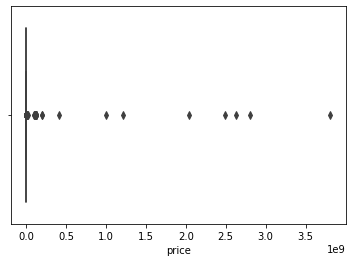

In [132]:
sns.boxplot(df['price'])

There are outliers in the price column

In [133]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

3995.0
17605.0
13610.0


In [134]:
Lower_Whisker = Q1 -  1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-16420.0 38020.0


In [135]:
outliers = df[(df.price < Lower_Whisker) | (df.price > Upper_Whisker)]

In [136]:
df_new = df.drop(outliers.index)

In [137]:
df_new.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,price,odometer,car_age
count,327118.000000,183318.000000,237789.000000
mean,10884.963506,105975.690636,11.313110
std,9106.645392,133906.647534,10.762963
min,0.000000,0.000000,-1.000000
25%,3900.000000,51248.000000,5.000000
50%,8500.000000,98000.000000,9.000000
75%,15997.000000,143223.500000,14.000000
max,38000.000000,10000000.000000,120.000000


In [138]:
#Our minimum price is still 0, which is not right, lets set our minimum price 1000
vehicles_below1k = df_new[(df_new.price < 1000)]
df_new = df_new.drop(vehicles_below1k.index)

In [139]:
df_new.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,price,odometer,car_age
count,288239.000000,165368.000000,210015.000000
mean,12335.743931,108726.054515,11.707921
std,8740.689574,138686.409005,10.848998
min,1000.000000,0.000000,-1.000000
25%,5495.000000,55000.000000,5.000000
50%,9995.000000,100502.500000,9.000000
75%,17188.500000,145900.500000,15.000000
max,38000.000000,10000000.000000,120.000000


<AxesSubplot:xlabel='price'>

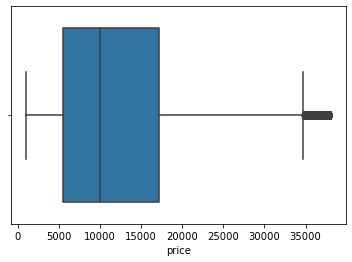

In [140]:
sns.boxplot(x = df_new['price'])

###### The Outliers in the price column have been taken care of. Now let's explore the odometer column. We can see that the minimum distance travelled is 0, but that cannot be right, because if a car has been used, then it has definitely travelled some miles

<AxesSubplot:xlabel='odometer'>

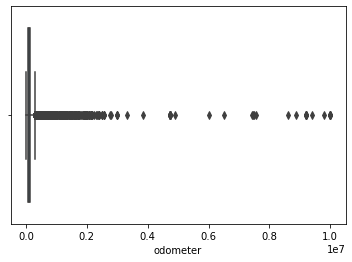

In [141]:
sns.boxplot(x = df_new['odometer'])

In [142]:
#Let's remove outliers from the odometer column:
Q11 = df_new['odometer'].quantile(0.25)
Q31 = df_new['odometer'].quantile(0.75)

IQR1 = Q31 - Q11

print(Q11)
print(Q31)
print(IQR)

55000.0
145900.5
13610.0


In [143]:
Lower_Whisker1 = Q11 -  1.5*IQR1
Upper_Whisker1 = Q31 + 1.5*IQR1
print(Lower_Whisker1, Upper_Whisker1)

-81350.75 282251.25


In [144]:
outliers1 = df_new[(df_new.odometer < Lower_Whisker1) | (df_new.odometer > Upper_Whisker1)]

In [145]:
df_new = df_new.drop(outliers1.index)

<AxesSubplot:xlabel='odometer'>

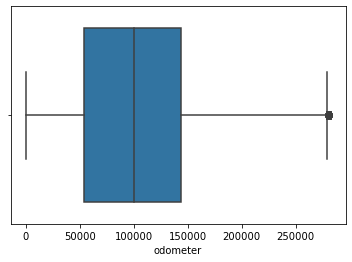

In [146]:
sns.boxplot(x = df_new['odometer'])

In [147]:
df_new.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,price,odometer,car_age
count,286429.000000,163558.000000,208205.000000
mean,12355.341355,102729.235036,11.667871
std,8740.961398,59795.003820,10.857340
min,1000.000000,0.000000,-1.000000
25%,5497.000000,54206.250000,5.000000
50%,9995.000000,99946.500000,9.000000
75%,17293.000000,144000.000000,14.000000
max,38000.000000,282150.000000,120.000000


In [148]:
#Our minimum odometer is still 0, which is not right, lets set our minimum odometer to 500
vehicles_below500miles = df_new[(df_new.odometer < 500)]
df_new = df_new.drop(vehicles_below500miles.index)

In [149]:
df_new.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,price,odometer,car_age
count,283067.000000,160196.000000,204849.000000
mean,12353.934305,104883.159611,11.636039
std,8726.462584,58521.591143,10.775313
min,1000.000000,500.000000,-1.000000
25%,5499.000000,58000.000000,5.000000
50%,9995.000000,101266.000000,9.000000
75%,17220.000000,145000.000000,14.000000
max,38000.000000,282150.000000,120.000000


###### It's not possible for the age of a car to be -1, so we'll drop all values less than 1 in the car_age column

In [150]:
vehicles_below1year = df_new[(df_new.car_age < 1)]
df_new = df_new.drop(vehicles_below1year.index)

<AxesSubplot:xlabel='car_age'>

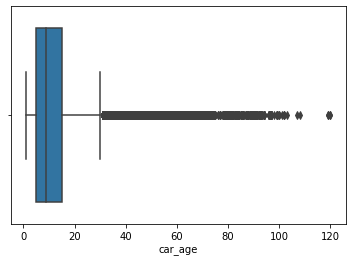

In [151]:
sns.boxplot(x = df_new['car_age'])

In [152]:
#Removing outliers from the car_age column
#Let's remove outliers from the odometer column:
Q12 = df_new['car_age'].quantile(0.25)
Q32 = df_new['car_age'].quantile(0.75)

IQR2 = Q32 - Q12

print(Q12)
print(Q32)
print(IQR2)

5.0
15.0
10.0


In [153]:
Lower_Whisker2 = Q12 -  1.5*IQR2
Upper_Whisker2 = Q32 + 1.5*IQR2
print(Lower_Whisker2, Upper_Whisker2)

-10.0 30.0


In [154]:
Lower_Whisker2 = Q12 -  1.5*IQR2
Upper_Whisker2 = Q32 + 1.5*IQR2
print(Lower_Whisker2, Upper_Whisker2)

-10.0 30.0


In [155]:
outliers2 = df_new[(df_new.car_age < Lower_Whisker2) | (df_new.car_age > Upper_Whisker2)]

In [156]:
df_new = df_new.drop(outliers2.index)

<AxesSubplot:xlabel='car_age'>

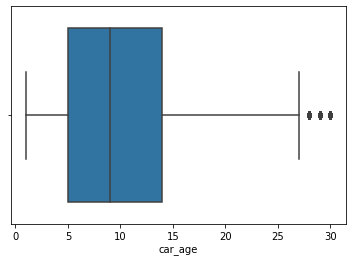

In [157]:
sns.boxplot(x = df_new['car_age'])

In [158]:
df_new.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,price,odometer,car_age
count,271577.000000,154900.000000,193359.000000
mean,12317.777938,106168.637050,9.792779
std,8683.862901,58217.927601,5.949679
min,1000.000000,500.000000,1.000000
25%,5500.000000,59605.250000,5.000000
50%,9995.000000,103000.000000,9.000000
75%,16999.000000,146241.500000,14.000000
max,38000.000000,282150.000000,30.000000


###### Check Missing Values after removing outliers

In [159]:
#check missing values
missing_values = df_new.isnull().sum()
#check percentages of missing data in each column
missing_percentage = round((df_new.isnull().sum()/df_new.shape[0] *100),2)
#Put the in a dataframe
missing_df = pd.DataFrame(missing_values, columns = ['missing_values'])
missing_p = pd.DataFrame(missing_percentage, columns = ['missing_percentages'])
missing_df['missing_percentages'] = missing_p
missing_df.sort_values(by = 'missing_percentages', ascending=False)

,missing_values,missing_percentages
condition,154203,56.78
cylinders,147836,54.44
paint_color,136888,50.40
drive,136366,50.21
type,134254,49.43
odometer,116677,42.96
manufacturer,84863,31.25
model,80010,29.46
fuel,79020,29.10
title_status,78758,29.00


### Exploring Categorical features and filling NaN Values

##### We still have lots of NaN values. Let's explore  our categorical columns to see if we can fill them

Text(0, 0.5, 'Count of cars')

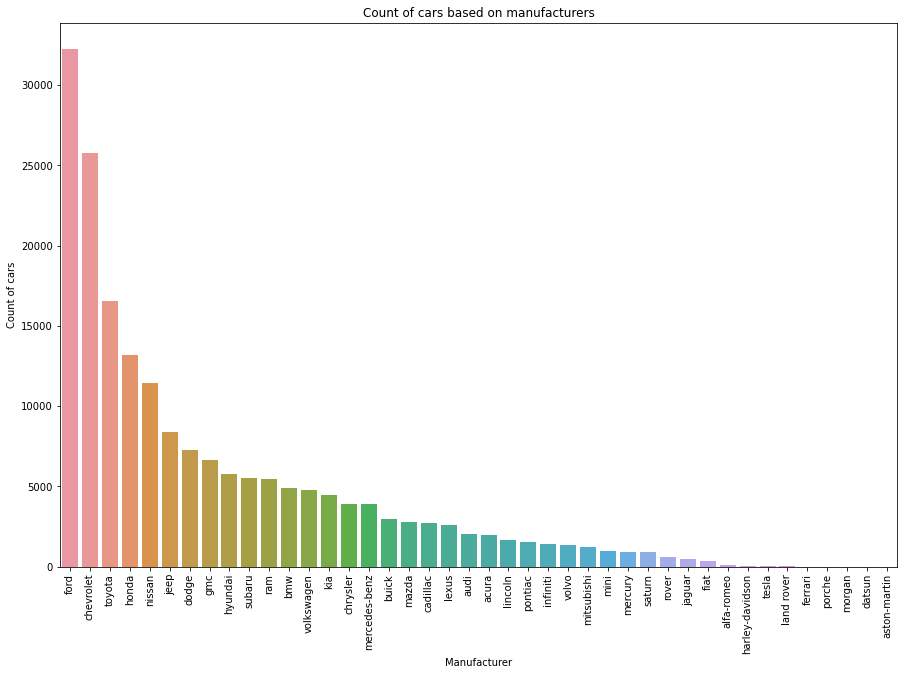

In [160]:
plt.figure(figsize = (15, 10))
plot = sns.countplot(x = 'manufacturer', data = df_new, order=df_new['manufacturer'].value_counts().index)
plt.xticks(rotation = 90)

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Ford manufacturers the most cars

Text(0, 0.5, 'Mean Age of cars')

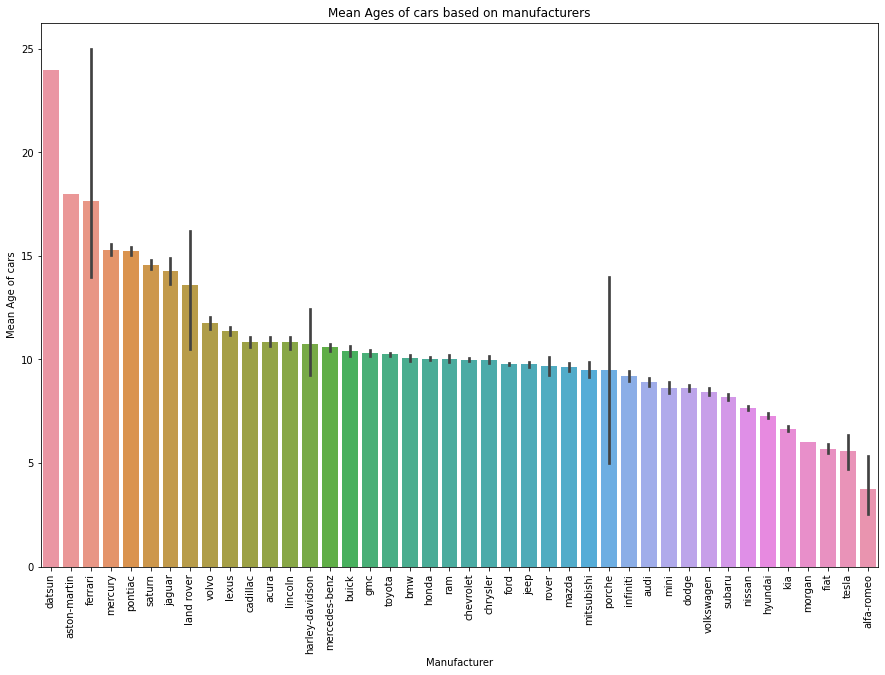

In [161]:
plt.figure(figsize = (15, 10))
d =df_new.groupby('manufacturer')['car_age'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'manufacturer', y = 'car_age',data = df_new, order=d.index)
plt.xticks(rotation = 90)

plt.title("Mean Ages of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Mean Age of cars")

On average, Datsun cars are the oldest

Text(0, 0.5, 'Mean Price of cars')

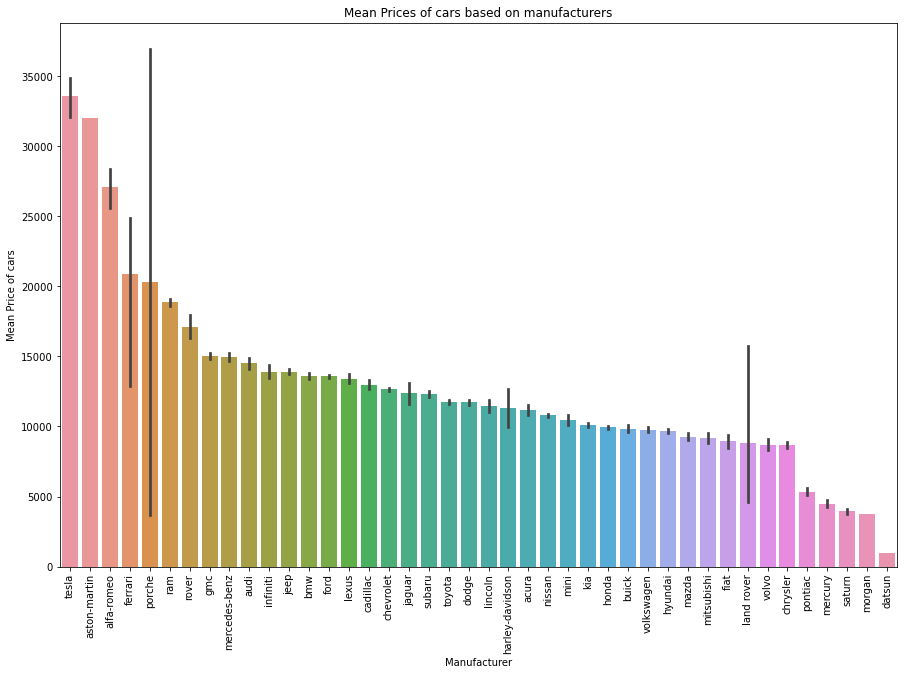

In [162]:
plt.figure(figsize = (15, 10))
d =df_new.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'manufacturer', y = 'price',data = df_new, order=d.index)
plt.xticks(rotation = 90)

plt.title("Mean Prices of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Mean Price of cars")

On average, Tesla manufactures the most expensive cars

Text(0, 0.5, 'Count of car types')

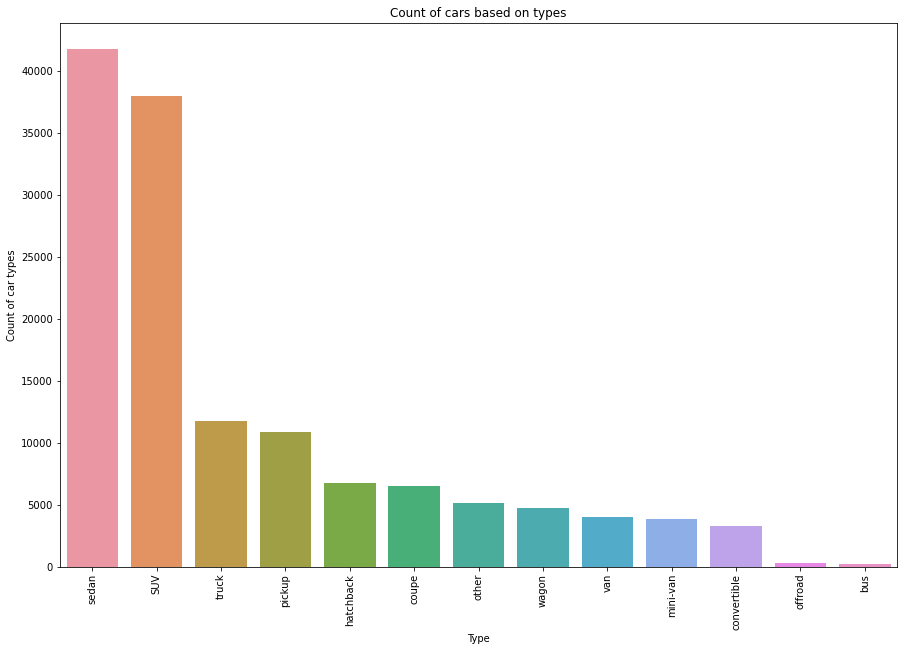

In [163]:
plt.figure(figsize = (15, 10))
#d =vehicles_df['type'].sort_values(ascending=False)
d =df_new['type'].value_counts()
plot = sns.countplot(x = 'type', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Count of cars based on types")
plt.xlabel("Type")
plt.ylabel("Count of car types")

Sedans are the most common car types followed by SUVs

Text(0, 0.5, 'Count of car models')

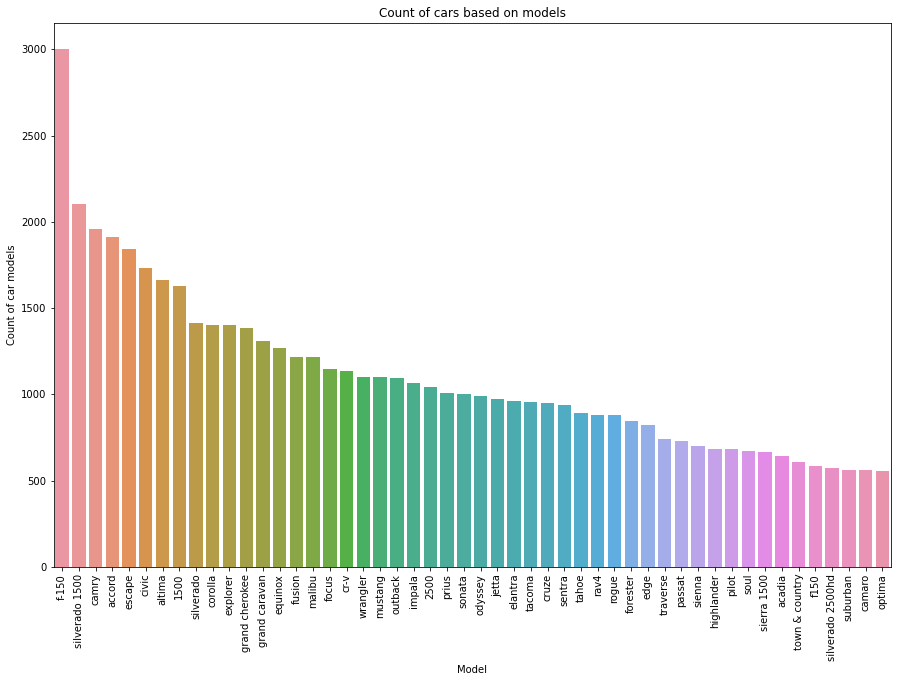

In [164]:
plt.figure(figsize = (15, 10))
d =df_new['model'].value_counts().head(50)#top 50 car models
plot = sns.countplot(x = 'model', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Count of cars based on models")
plt.xlabel("Model")
plt.ylabel("Count of car models")

The most common car model is f-150

In [165]:
df_new.groupby('condition')['car_age'].mean().sort_values(ascending=False)

condition
fair         17.067519
salvage      13.951613
good         11.451176
excellent     9.840412
new           8.699725
like new      7.885613
Name: car_age, dtype: float64

In [166]:
df_new['condition'].value_counts()

excellent    56276
good         43309
like new     12720
fair          4458
new            363
salvage        248
Name: condition, dtype: int64

Text(0, 0.5, 'Count of car conditions')

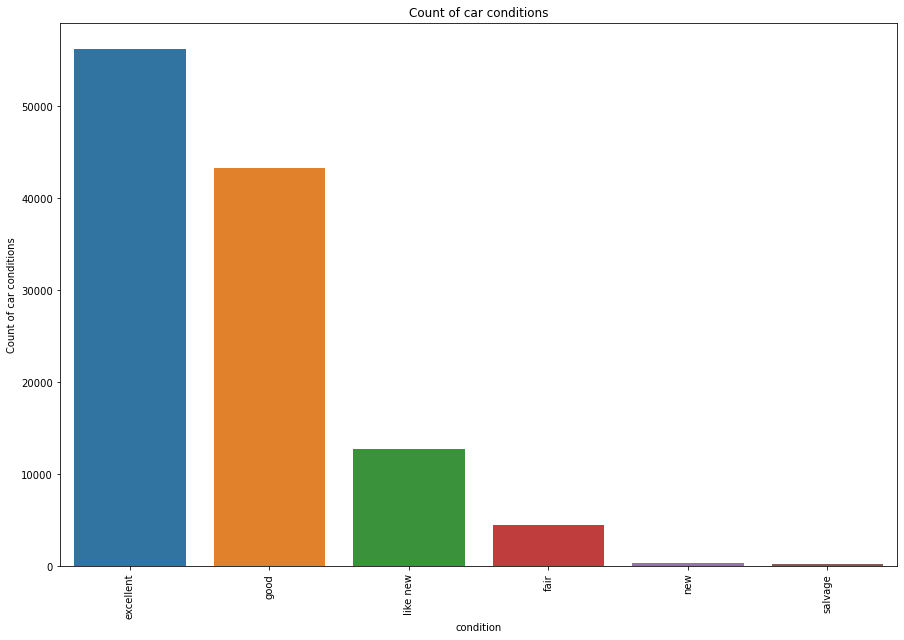

In [167]:
plt.figure(figsize = (15, 10))
d =df_new['condition'].value_counts()
plot = sns.countplot(x = 'condition', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Count of car conditions")
plt.xlabel("condition")
plt.ylabel("Count of car conditions")

Text(0, 0.5, 'Car Ages')

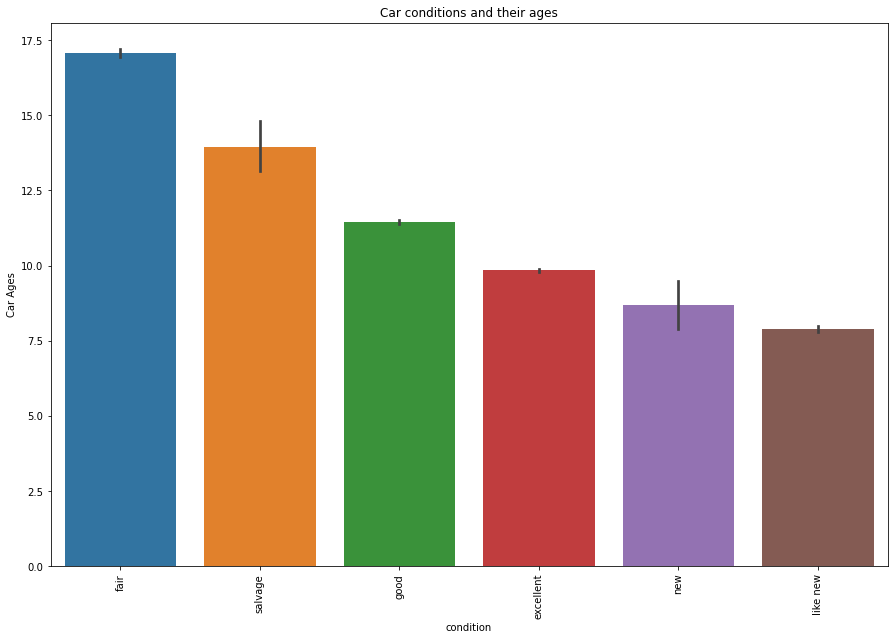

In [168]:
plt.figure(figsize = (15, 10))
d =df_new.groupby('condition')['car_age'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'condition', y = 'car_age', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Car conditions and their ages")
plt.xlabel("condition")
plt.ylabel("Car Ages")

It would be expected that cars in salvage conditions have more years than those in fair conditions, but surprisingly, this is not the case here. What could be the reason fo this? Poor maintenance? Missing data?
Also, new cars are older than like new cars

Going by the chart above, cars are over 11 years on average before they need major repairs

Text(0, 0.5, 'Odometer')

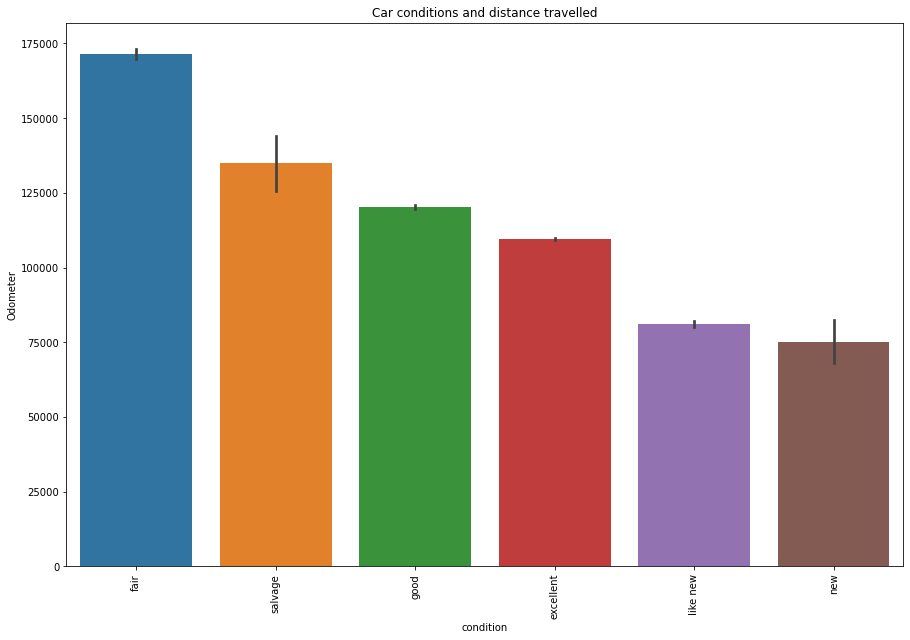

In [169]:
plt.figure(figsize = (15, 10))
d =df_new.groupby('condition')['odometer'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'condition', y = 'odometer', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Car conditions and distance travelled")
plt.xlabel("condition")
plt.ylabel("Odometer")

Again, it's surprising that cars in salvage conditions have travelled less distance than those in fair conditions

In [170]:
df_new.groupby('condition')['car_age'].mean().sort_values(ascending=False)

condition
fair         17.067519
salvage      13.951613
good         11.451176
excellent     9.840412
new           8.699725
like new      7.885613
Name: car_age, dtype: float64

In [171]:
df_new.groupby('condition')['odometer'].mean().sort_values(ascending=False)

condition
fair         171573.371729
salvage      135012.645161
good         120346.489357
excellent    109495.772544
like new      81016.502923
new           75161.803213
Name: odometer, dtype: float64

##### we can use the information we have from the above 2 charts to fill missing values in the 'condition' column

In [172]:
df_new.groupby('condition')['car_age'].mean().sort_values(ascending=False)

condition
fair         17.067519
salvage      13.951613
good         11.451176
excellent     9.840412
new           8.699725
like new      7.885613
Name: car_age, dtype: float64

In [173]:
df_new.groupby('condition')['odometer'].mean().sort_values(ascending=False)

condition
fair         171573.371729
salvage      135012.645161
good         120346.489357
excellent    109495.772544
like new      81016.502923
new           75161.803213
Name: odometer, dtype: float64

In [174]:
#write a funcion to replace missing values in the condition column using mean values of car_age and odometer
def replace_condition(cols):
    condition=cols[0]
    Car_Age = cols[1]
    odometer = cols[2]
    
    if pd.isnull(condition):
        
        if ((Car_Age > 13.951613) & (Car_Age <=17.067519)) | ((odometer> 135012.645161) & (odometer <= 171573.371729)):
            return 'fair'
        elif (Car_Age >  11.451176) & (Car_Age <=13.951613) | ((odometer> 120346.489357) & (odometer <= 135012.645161)):
            return 'salvage'
        elif (Car_Age > 9.840412) & (Car_Age <=11.451176) | ((odometer> 105871.576275) & (odometer <= 120346.489357)):
            return 'good'
        elif (Car_Age > 8.699725) & (Car_Age <= 9.840412) | ((odometer> 81016.502923) & (odometer <= 105871.576275)):
            return 'excellent'
        elif (Car_Age <=7.885613) | ((odometer> 75161.803213) & (odometer <=81016.502923)):
            return 'like new'
        elif (Car_Age > 7.885613 )& (Car_Age <=8.699725)| ((odometer<= 75161.803213)):
            return 'new'
        #else:
            #return ' '
        
    else:
        return condition
    

In [175]:
#replace missing values in the condition colum using the function above
df_new['condition']= df_new[['condition', 'car_age', 'odometer']].apply(replace_condition,axis =1)

In [176]:
#check missing values
missing_values = df_new.isnull().sum()
#check percentages of missing data in each column
missing_percentage = round((df_new.isnull().sum()/df_new.shape[0] *100),2)
#Put the in a dataframe
missing_df = pd.DataFrame(missing_values, columns = ['missing_values'])
missing_p = pd.DataFrame(missing_percentage, columns = ['missing_percentages'])
missing_df['missing_percentages'] = missing_p
missing_df.sort_values(by = 'missing_percentages', ascending=False)

,missing_values,missing_percentages
cylinders,147836,54.44
paint_color,136888,50.40
drive,136366,50.21
type,134254,49.43
odometer,116677,42.96
manufacturer,84863,31.25
condition,82371,30.33
model,80010,29.46
fuel,79020,29.10
title_status,78758,29.00


###### The NaN values in the 'condition' column are now reduced from 198703 to 82371. We will drop the rows with NaN values in the condition column, but first, let's use the same startegy to fill NaN values in odometer and car_age columns

Text(0, 0.5, 'Odometer')

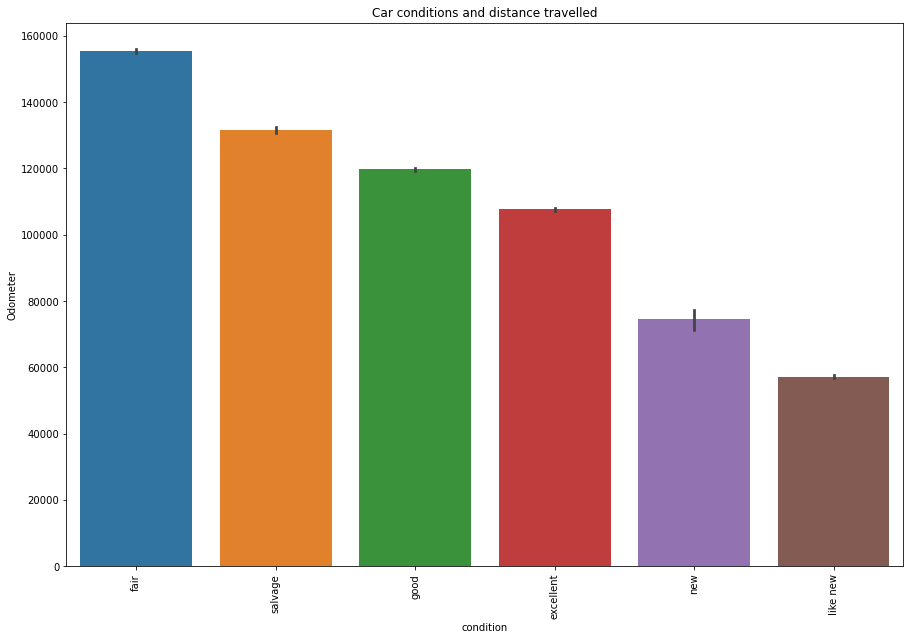

In [177]:
plt.figure(figsize = (15, 10))
d =df_new.groupby('condition')['odometer'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'condition', y = 'odometer', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Car conditions and distance travelled")
plt.xlabel("condition")
plt.ylabel("Odometer")

In [178]:
df_new.groupby('condition')['odometer'].mean().sort_values(ascending=False)

condition
fair         155484.937060
salvage      131536.083809
good         119725.907267
excellent    107684.635000
new           74487.712434
like new      57203.624545
Name: odometer, dtype: float64

In [179]:
#write a funcion to replace missing values in the odometer column using the condition column
def replace_odometer(cols):
    odometer = cols[0]
    condition = cols[1]
    
    if pd.isnull(odometer):
        
        if (condition == 'fair'):
            return 155484.937060
        elif (condition == 'salvage'):
            return 131536.083809
        elif (condition == 'good'):
            return 119725.907267
        elif (condition == 'excellent'):
            return 107684.635000
        elif (condition == 'like new'):
            return 57203.624545
        elif (condition == 'new'):
            return 74487.712434

        
    else:
        return odometer
    

In [180]:
#replace missing values in the odometer colum using the function above
df_new['odometer']= df_new[['odometer', 'condition']].apply(replace_odometer,axis =1)

In [181]:
df_new.groupby('condition')['car_age'].mean().sort_values(ascending=False)

condition
fair         14.229189
salvage      11.219861
good         11.110234
new           9.574671
excellent     9.476821
like new      4.980624
Name: car_age, dtype: float64

In [182]:
#write a funcion to replace missing values in the car_age column using the condition column
def replace_car_age(cols):
    car_age = cols[0]
    condition = cols[1]
    
    if pd.isnull(car_age):
        
        if (condition == 'fair'):
            return 14.229189
        elif (condition == 'salvage'):
            return 11.219861
        elif (condition == 'good'):
            return 11.110234
        elif (condition == 'excellent'):
            return 9.574671
        elif (condition == 'like new'):
            return 9.476821
        elif (condition == 'new'):
            return 4.980624

        
    else:
        return car_age
    

In [183]:
#replace missing values in the car_age colum using the function above
df_new['car_age']= df_new[['car_age', 'condition']].apply(replace_car_age,axis =1)

In [184]:
#check missing values
missing_values = df_new.isnull().sum()
#check percentages of missing data in each column
missing_percentage = round((df_new.isnull().sum()/df_new.shape[0] *100),2)
#Put the in a dataframe
missing_df = pd.DataFrame(missing_values, columns = ['missing_values'])
missing_p = pd.DataFrame(missing_percentage, columns = ['missing_percentages'])
missing_df['missing_percentages'] = missing_p
missing_df.sort_values(by = 'missing_percentages', ascending=False)

,missing_values,missing_percentages
cylinders,147836,54.44
paint_color,136888,50.40
drive,136366,50.21
type,134254,49.43
manufacturer,84863,31.25
condition,82371,30.33
odometer,81416,29.98
model,80010,29.46
fuel,79020,29.10
title_status,78758,29.00


The NaN values in the odometer column have reduced from 150953 to 81416, while those in the car_age column have only reduced from 94677 to 77873 

In [185]:
df_new.groupby('condition')['price'].mean().sort_values(ascending=False)

condition
like new     18314.322260
new          13672.937378
excellent    12342.248377
good         10151.324183
salvage       9532.775974
fair          6975.936894
Name: price, dtype: float64

Text(0, 0.5, 'Mean Price')

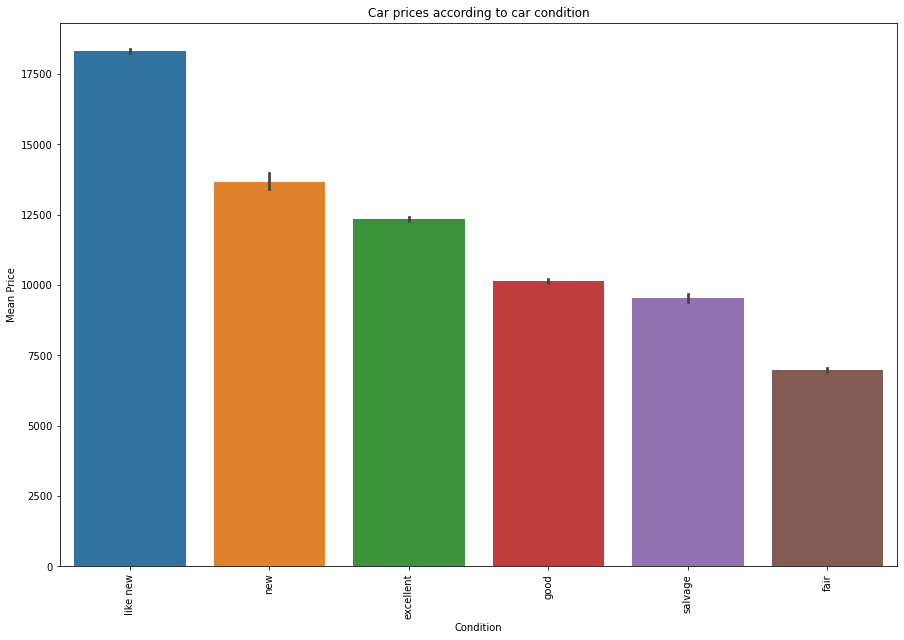

In [186]:
plt.figure(figsize = (15, 10))
d =df_new.groupby('condition')['price'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'condition', y = 'price', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Car prices according to car condition")
plt.xlabel("Condition")
plt.ylabel("Mean Price")

cars in fair conditions are the cheapest and like new cars, the most expensive

Text(0, 0.5, 'Mean Price')

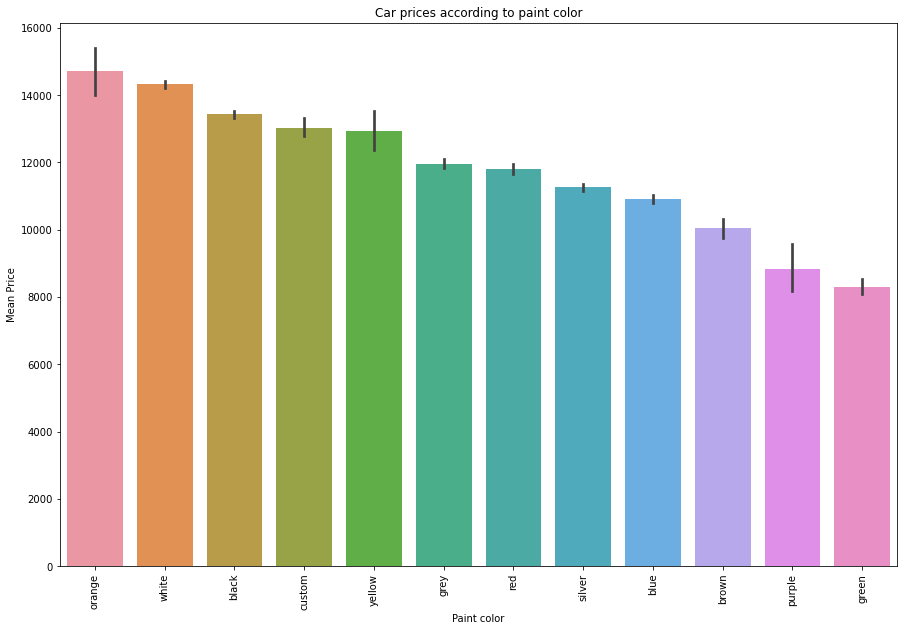

In [187]:
plt.figure(figsize = (15, 10))
d =df_new.groupby('paint_color')['price'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'paint_color', y = 'price', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Car prices according to paint color")
plt.xlabel("Paint color")
plt.ylabel("Mean Price")

On average, orange cars are the most expensive

In [188]:
df_new['paint_color'].value_counts()

white     31655
black     26015
silver    21287
grey      14517
blue      14467
red       13595
custom     4079
green      3839
brown      3101
yellow      917
orange      770
purple      447
Name: paint_color, dtype: int64

In [189]:
#check missing values
missing_values = df_new.isnull().sum()
#check percentages of missing data in each column
missing_percentage = round((df_new.isnull().sum()/df_new.shape[0] *100),2)
#Put the in a dataframe
missing_df = pd.DataFrame(missing_values, columns = ['missing_values'])
missing_p = pd.DataFrame(missing_percentage, columns = ['missing_percentages'])
missing_df['missing_percentages'] = missing_p
missing_df.sort_values(by = 'missing_percentages', ascending=False)

,missing_values,missing_percentages
cylinders,147836,54.44
paint_color,136888,50.40
drive,136366,50.21
type,134254,49.43
manufacturer,84863,31.25
condition,82371,30.33
odometer,81416,29.98
model,80010,29.46
fuel,79020,29.10
title_status,78758,29.00


In [190]:
df_new['type'].value_counts()

sedan          41753
SUV            38003
truck          11779
pickup         10909
hatchback       6732
coupe           6497
other           5154
wagon           4764
van             3978
mini-van        3894
convertible     3329
offroad          312
bus              219
Name: type, dtype: int64

In [191]:
df_new['drive'].value_counts()

fwd    60274
4wd    52624
rwd    22313
Name: drive, dtype: int64

<AxesSubplot:xlabel='type', ylabel='price'>

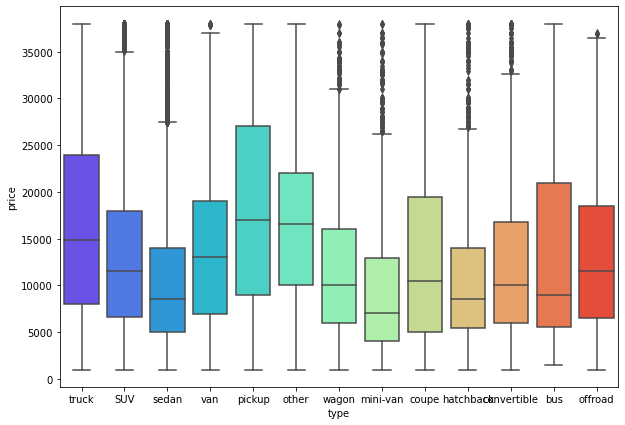

In [192]:
plt.figure(figsize = (10, 7))
sns.boxplot(x='type',y='price',data=df_new,palette='rainbow')

<AxesSubplot:xlabel='type', ylabel='price'>

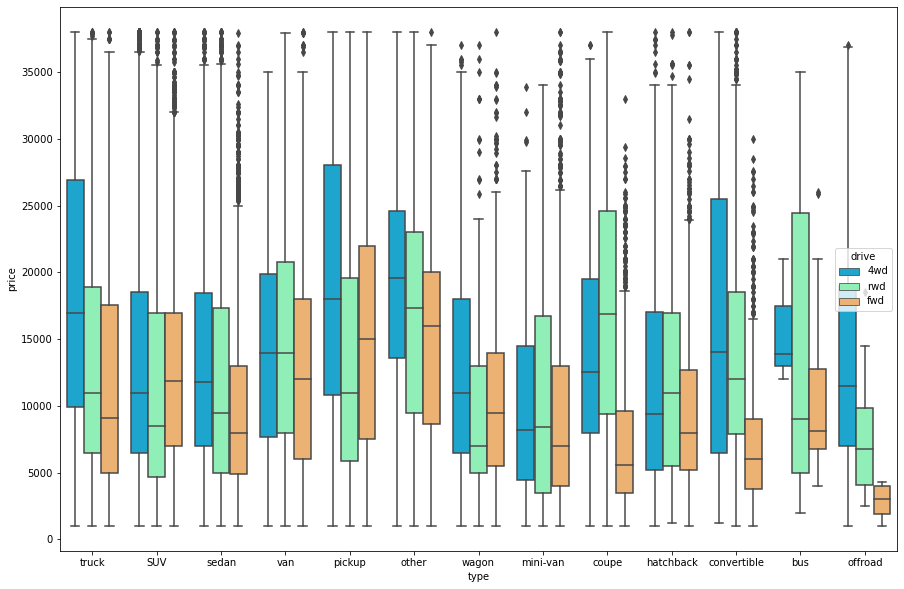

In [193]:
plt.figure(figsize = (15, 10))
sns.boxplot(x='type',y='price', hue = 'drive', data=df_new,palette='rainbow')

In [194]:
df_new.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

Text(0, 0.5, 'Mean Price')

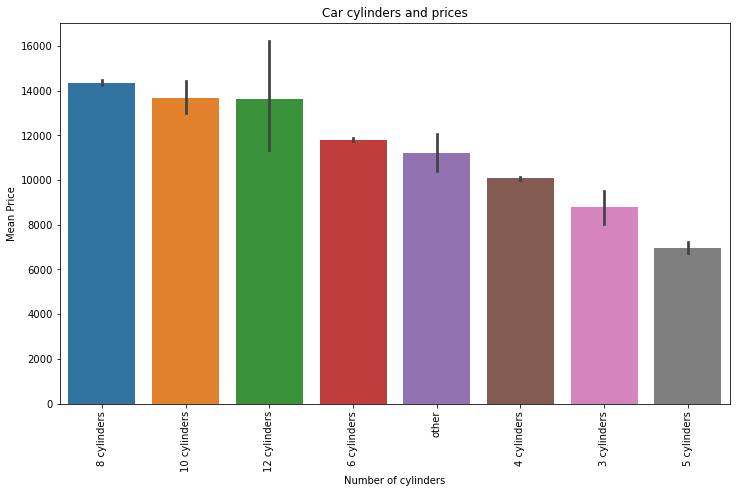

In [195]:
plt.figure(figsize = (12, 7))
d =df_new.groupby('cylinders')['price'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'cylinders', y = 'price', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Car cylinders and prices")
plt.xlabel("Number of cylinders")
plt.ylabel("Mean Price")

On average, Vehicles with 8 cylinders are the most expensive

Text(0, 0.5, 'Mean Price')

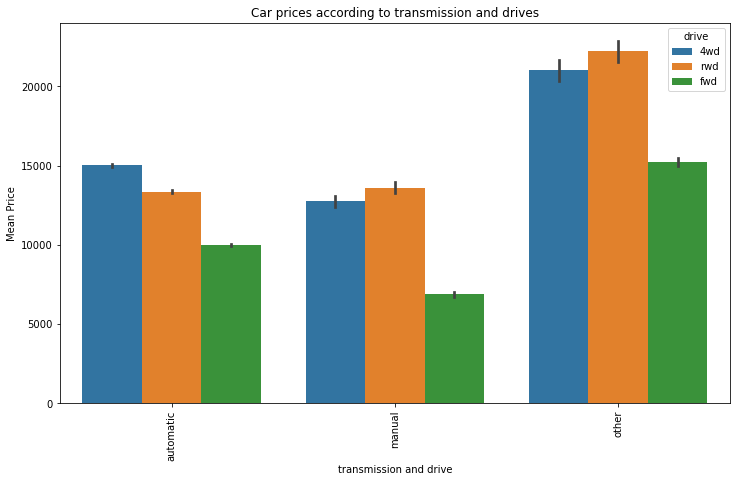

In [196]:
plt.figure(figsize = (12, 7))
d =df_new.groupby('transmission')['price'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'transmission', y = 'price', hue = 'drive', data = df_new)
plt.xticks(rotation = 90)

plt.title("Car prices according to transmission and drives")
plt.xlabel("transmission and drive")
plt.ylabel("Mean Price")

Text(0, 0.5, 'Mean Price')

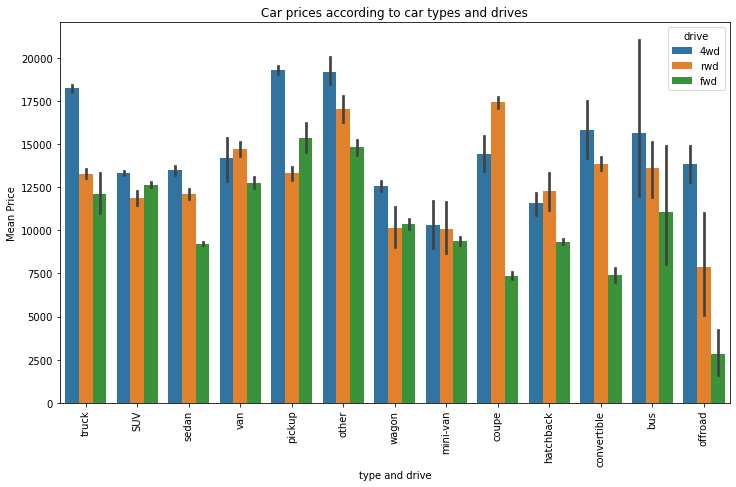

In [197]:
plt.figure(figsize = (12, 7))
d =df_new.groupby('type')['price'].mean().sort_values(ascending=False)
plot = sns.barplot(x = 'type', y = 'price', hue = 'drive', data = df_new)
plt.xticks(rotation = 90)

plt.title("Car prices according to car types and drives")
plt.xlabel("type and drive")
plt.ylabel("Mean Price")

Text(0, 0.5, 'Count')

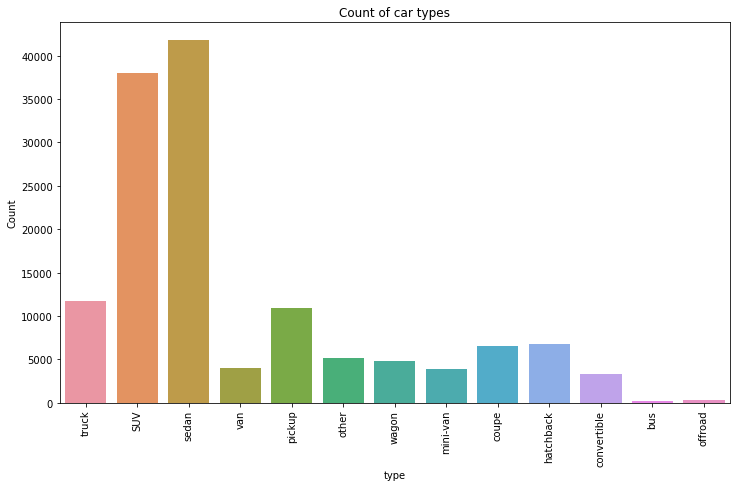

In [198]:
plt.figure(figsize = (12, 7))
plot = sns.countplot(x = 'type', data = df_new)
plt.xticks(rotation = 90)

plt.title("Count of car types")
plt.xlabel("type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

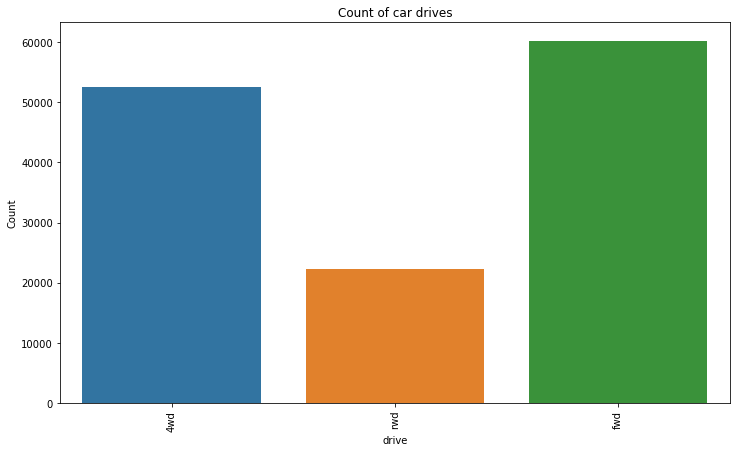

In [199]:
plt.figure(figsize = (12, 7))
plot = sns.countplot(x = 'drive', data = df_new)
plt.xticks(rotation = 90)

plt.title("Count of car drives")
plt.xlabel("drive")
plt.ylabel("Count")

######  Let's group type and drive and see if we can use the insight we get to fill missing values:

In [200]:
df_new.groupby(['type', 'drive']).size()

type         drive
SUV          4wd      22382
             fwd       8736
             rwd       2164
bus          4wd          3
             fwd         16
             rwd        139
convertible  4wd        145
             fwd        740
             rwd       1905
coupe        4wd        273
             fwd       2293
             rwd       3034
hatchback    4wd        543
             fwd       4839
             rwd        233
mini-van     4wd        120
             fwd       3193
             rwd        106
offroad      4wd        282
             fwd          4
             rwd         10
other        4wd        533
             fwd       1079
             rwd        531
pickup       4wd       7083
             fwd        453
             rwd       2188
sedan        4wd       3561
             fwd      28401
             rwd       4163
truck        4wd       7395
             fwd        250
             rwd       3213
van          4wd        153
             fwd       1819
 

In [201]:
df_new['type'].value_counts()

sedan          41753
SUV            38003
truck          11779
pickup         10909
hatchback       6732
coupe           6497
other           5154
wagon           4764
van             3978
mini-van        3894
convertible     3329
offroad          312
bus              219
Name: type, dtype: int64

In [202]:
df_new['drive'].value_counts()

fwd    60274
4wd    52624
rwd    22313
Name: drive, dtype: int64

In [203]:
drive_type_table = pd.crosstab(index = df_new['type'], columns = df_new['drive'])
drive_type_table

drive,4wd,fwd,rwd
type,,,
SUV,22382,8736,2164
bus,3,16,139
convertible,145,740,1905
coupe,273,2293,3034
hatchback,543,4839,233
mini-van,120,3193,106
offroad,282,4,10
other,533,1079,531
pickup,7083,453,2188


<AxesSubplot:xlabel='type'>

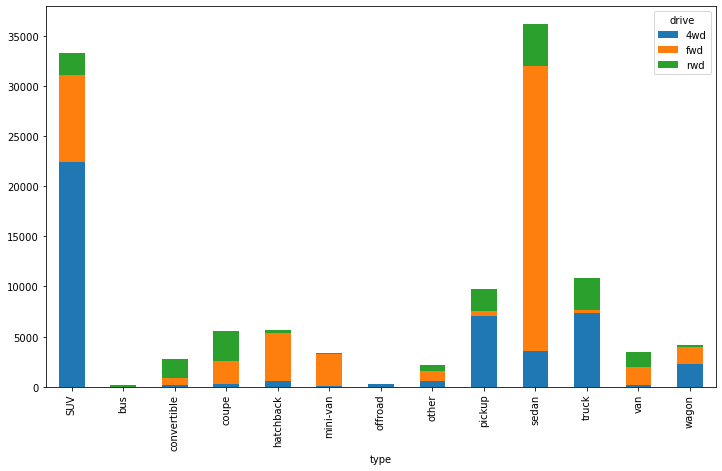

In [204]:
drive_type_table.plot(kind="bar", figsize=(12,7), stacked=True)

###### We will use the information from the chart above to impute missing values in the drive column using mode

In [205]:
#write a funcion to replace missing values in the drive with the mode(most common value) of car types 
def replace_drive(cols):
    drive = cols[0]
    typee = cols[1]
    
    if pd.isnull(drive):
        
        if (typee == 'SUV'):
            return '4wd'
        elif (typee == 'bus'):
            return 'rwd'
        elif (typee == 'convertible'):
            return 'rwd'
        elif (typee == 'coupe'):
            return 'rwd'
        elif (typee == 'hatchback'):
            return 'fwd'
        elif (typee == 'mini-van'):
            return 'fwd'
        elif (typee == 'offroad'):
            return '4wd'
        elif (typee == 'other'):
            return 'fwd'
        elif (typee == 'pickup'):
            return '4wd'
        elif (typee == 'sedan'):
            return 'fwd'
        elif (typee == 'truck'):
            return '4wd'
        elif (typee == 'van'):
            return 'fwd'
        elif (typee == 'wagon'):
            return '4wd'


        
    else:
        return drive
    

In [206]:
#replace missing values in the drive colum using the function above
df_new['drive']= df_new[['drive', 'type']].apply(replace_drive,axis =1)

###### We will do the same for type column:

In [207]:
type_drive_table = pd.crosstab(index = df_new['drive'], columns = df_new['type'])
type_drive_table

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon
drive,,,,,,,,,,,,,
4wd,27103,3,145,273,543,120,298,533,8268,3561,8316,153,2852
fwd,8736,16,740,2293,5956,3668,4,4090,453,34029,250,2308,1755
rwd,2164,200,2444,3931,233,106,10,531,2188,4163,3213,1517,157


<AxesSubplot:xlabel='drive'>

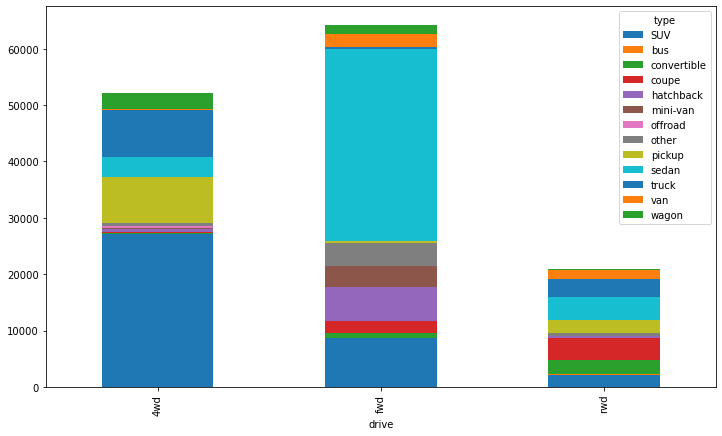

In [208]:
type_drive_table.plot(kind="bar", figsize=(12,7), stacked=True)

In [209]:
#write a funcion to replace missing values in the type with the mode(most common value) of car drives 
def replace_type(cols):
    typee = cols[0]
    drive = cols[1]
    
    if pd.isnull(typee):
        
        if (drive == '4wd'):
            return 'SUV'
        elif (drive == 'fwd'):
            return 'sedan'
        else:
            return typee
    
        
    else:
        return typee
    

In [210]:
#replace missing values in the type colum using the function above
df_new['type']= df_new[['type', 'drive']].apply(replace_type,axis =1)

In [211]:
#check missing values
missing_values = df_new.isnull().sum()
#check percentages of missing data in each column
missing_percentage = round((df_new.isnull().sum()/df_new.shape[0] *100),2)
#Put the in a dataframe
missing_df = pd.DataFrame(missing_values, columns = ['missing_values'])
missing_p = pd.DataFrame(missing_percentage, columns = ['missing_percentages'])
missing_df['missing_percentages'] = missing_p
missing_df.sort_values(by = 'missing_percentages', ascending=False)

,missing_values,missing_percentages
cylinders,147836,54.44
paint_color,136888,50.40
type,119652,44.06
drive,116699,42.97
manufacturer,84863,31.25
condition,82371,30.33
odometer,81416,29.98
model,80010,29.46
fuel,79020,29.10
title_status,78758,29.00


Text(0, 0.5, 'Count')

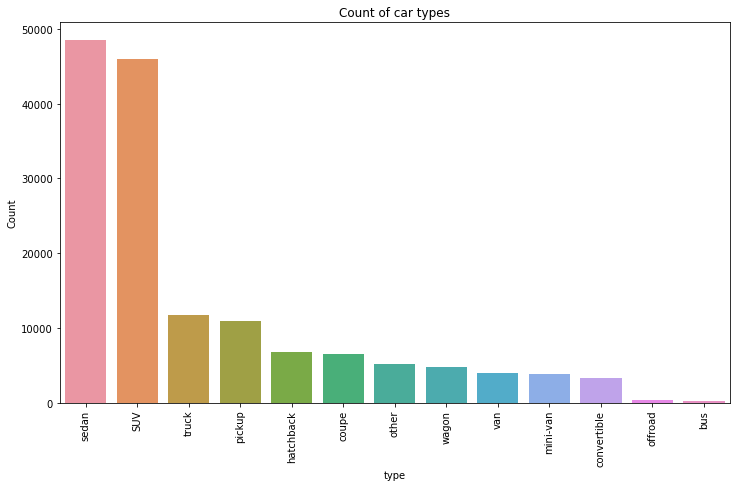

In [212]:
plt.figure(figsize = (12, 7))
d= df_new['type'].value_counts().sort_values(ascending =False)
plot = sns.countplot(x = 'type', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Count of car types")
plt.xlabel("type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

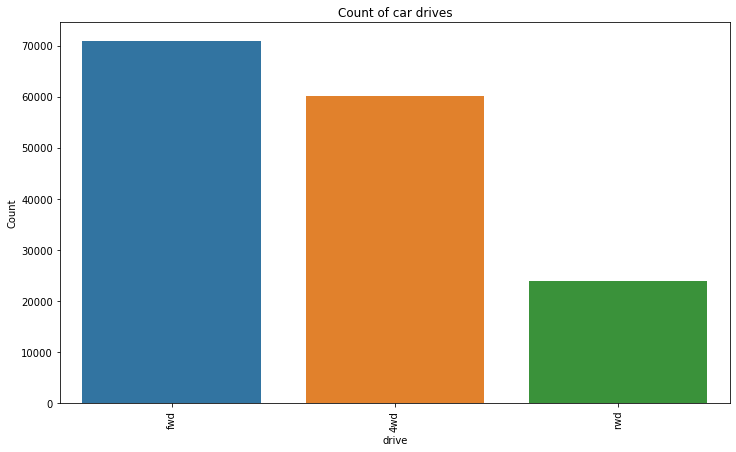

In [213]:
plt.figure(figsize = (12, 7))
d= df_new['drive'].value_counts().sort_values(ascending =False)
plot = sns.countplot(x = 'drive', data = df_new, order = d.index)
plt.xticks(rotation = 90)

plt.title("Count of car drives")
plt.xlabel("drive")
plt.ylabel("Count")

The NaN values in drive column have reduced from 164727 to 116699, while NaN values in type column have reduced from  161084 to 119652

In [214]:
df_new.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

In [215]:
df_new['transmission'].value_counts()

automatic    174821
manual        13053
other          5253
Name: transmission, dtype: int64

###### Majority of transmission is automatic, so we fill NaN values with the modal value', automatic'

In [216]:
df_new['transmission']= df_new['transmission'].fillna('automatic')

In [217]:
df_new['transmission'].isnull().sum()

0

In [218]:
df_new['transmission'].value_counts()

automatic    253271
manual        13053
other          5253
Name: transmission, dtype: int64

In [219]:
df_new.isnull().sum().sort_values()

price                0
transmission         0
car_age          77873
title_status     78758
fuel             79020
model            80010
odometer         81416
condition        82371
manufacturer     84863
drive           116699
type            119652
paint_color     136888
cylinders       147836
dtype: int64

In [220]:
df_new['fuel'].value_counts()

gas         175060
diesel       10051
other         4361
hybrid        2588
electric       497
Name: fuel, dtype: int64

##### Majority of fuel type is gas, so we fill NaN values in the fuel column with the mode, gas:

In [221]:
df_new['fuel'].isnull().sum()

79020

In [222]:
df_new['fuel']= df_new['fuel'].fillna('gas')

In [223]:
df_new['fuel'].isnull().sum()

0

In [224]:
df_new.isnull().sum().sort_values()

price                0
fuel                 0
transmission         0
car_age          77873
title_status     78758
model            80010
odometer         81416
condition        82371
manufacturer     84863
drive           116699
type            119652
paint_color     136888
cylinders       147836
dtype: int64

In [225]:
df_new.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

###### We will try our model on two different datasets:
1. One where the remaining NaN values are dropped, and
2. Another where we'll group Missing values in our categorical features as 'unknown' and only drop NaN values in numerical features.

We'll see which one performs better

In [226]:
#Dataset with NaN values dropped
vehiclesdf_NaNDropped = df_new.dropna()

In [227]:
vehiclesdf_NaNDropped.to_csv('vehiclesdf_NaNDropped.csv', index = False)

In [228]:
vehiclesdf_withUnknownCat = df_new

In [229]:
#vehiclesdf_withUnknownCat['manufacturer'].value_counts()

In [230]:
vehiclesdf_withUnknownCat['manufacturer'].isnull().sum()

84863

In [231]:
vehiclesdf_withUnknownCat['manufacturer'] = vehiclesdf_withUnknownCat['manufacturer'].fillna('unknown')

In [232]:
vehiclesdf_withUnknownCat['manufacturer'].isnull().sum()

0

In [233]:
vehiclesdf_withUnknownCat['model'].isnull().sum()

80010

In [234]:
vehiclesdf_withUnknownCat['model'] = vehiclesdf_withUnknownCat['model'].fillna('model')

In [235]:
vehiclesdf_withUnknownCat['model'].isnull().sum()

0

In [236]:
vehiclesdf_withUnknownCat['condition'].isnull().sum()

82371

In [237]:
vehiclesdf_withUnknownCat['condition'] = vehiclesdf_withUnknownCat['condition'].fillna('unknown')
vehiclesdf_withUnknownCat['condition'].isnull().sum()

0

In [238]:
vehiclesdf_withUnknownCat['cylinders'].value_counts()

4 cylinders     48243
6 cylinders     45098
8 cylinders     27992
5 cylinders      1212
10 cylinders      500
other             378
3 cylinders       266
12 cylinders       52
Name: cylinders, dtype: int64

In [239]:
vehiclesdf_withUnknownCat['cylinders'] = vehiclesdf_withUnknownCat['cylinders'].fillna('other')
vehiclesdf_withUnknownCat['cylinders'].isnull().sum()

0

In [240]:
vehiclesdf_withUnknownCat['fuel'].value_counts()

gas         254080
diesel       10051
other         4361
hybrid        2588
electric       497
Name: fuel, dtype: int64

In [241]:
vehiclesdf_withUnknownCat['fuel'] = vehiclesdf_withUnknownCat['fuel'].fillna('other')
vehiclesdf_withUnknownCat['fuel'].isnull().sum()

0

In [242]:
df_new.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'car_age'],
      dtype='object')

In [243]:
vehiclesdf_withUnknownCat['title_status'].value_counts()

clean         183409
rebuilt         5012
salvage         2567
lien            1620
missing          149
parts only        62
Name: title_status, dtype: int64

In [244]:
vehiclesdf_withUnknownCat['title_status'] = vehiclesdf_withUnknownCat['title_status'].fillna('unknown')
vehiclesdf_withUnknownCat['title_status'].isnull().sum()

0

In [245]:
vehiclesdf_withUnknownCat['type'].value_counts()

sedan          48449
SUV            45909
truck          11779
pickup         10909
hatchback       6732
coupe           6497
other           5154
wagon           4764
van             3978
mini-van        3894
convertible     3329
offroad          312
bus              219
Name: type, dtype: int64

In [246]:
vehiclesdf_withUnknownCat['type'].isnull().sum()

119652

In [247]:
vehiclesdf_withUnknownCat['type'] = vehiclesdf_withUnknownCat['type'].fillna('unknown')
vehiclesdf_withUnknownCat['type'].isnull().sum()

0

In [248]:
vehiclesdf_withUnknownCat['type'].value_counts()

unknown        119652
sedan           48449
SUV             45909
truck           11779
pickup          10909
hatchback        6732
coupe            6497
other            5154
wagon            4764
van              3978
mini-van         3894
convertible      3329
offroad           312
bus               219
Name: type, dtype: int64

In [249]:
vehiclesdf_withUnknownCat['drive'].value_counts()

fwd    70994
4wd    60074
rwd    23810
Name: drive, dtype: int64

In [250]:
vehiclesdf_withUnknownCat['drive'].isnull().sum()

116699

In [251]:
vehiclesdf_withUnknownCat['drive'] = vehiclesdf_withUnknownCat['drive'].fillna('unknown')
vehiclesdf_withUnknownCat['drive'].isnull().sum()

0

In [252]:
vehiclesdf_withUnknownCat['drive'].value_counts()

unknown    116699
fwd         70994
4wd         60074
rwd         23810
Name: drive, dtype: int64

In [253]:
vehiclesdf_withUnknownCat['paint_color'].value_counts()

white     31655
black     26015
silver    21287
grey      14517
blue      14467
red       13595
custom     4079
green      3839
brown      3101
yellow      917
orange      770
purple      447
Name: paint_color, dtype: int64

In [254]:
vehiclesdf_withUnknownCat['paint_color'].isnull().sum()

136888

In [255]:
vehiclesdf_withUnknownCat['paint_color'] = vehiclesdf_withUnknownCat['paint_color'].fillna('unknown')
vehiclesdf_withUnknownCat['paint_color'].isnull().sum()

0

In [256]:
df_new.isnull().sum()

price               0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer        81416
title_status        0
transmission        0
drive               0
type                0
paint_color         0
car_age         77873
dtype: int64

Now, we only have missing values in the odometer and car_age columns, we'll drop all missing values

In [257]:
df_new = df_new.dropna()

In [258]:
df_new.isnull().sum()

price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
car_age         0
dtype: int64

In [259]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190161 entries, 0 to 343024
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         190161 non-null  int64  
 1   manufacturer  190161 non-null  object 
 2   model         190161 non-null  object 
 3   condition     190161 non-null  object 
 4   cylinders     190161 non-null  object 
 5   fuel          190161 non-null  object 
 6   odometer      190161 non-null  float64
 7   title_status  190161 non-null  object 
 8   transmission  190161 non-null  object 
 9   drive         190161 non-null  object 
 10  type          190161 non-null  object 
 11  paint_color   190161 non-null  object 
 12  car_age       190161 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 20.3+ MB


In [260]:
df_new.to_csv('vehiclesdf_WithUnknownCat.csv', index = False)